# Question -1

In [44]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
dataset = pd.read_csv(url)


dataset["Age"] = dataset["Age"].fillna(-1)


In [37]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [33]:



#loop to handle missing values
# Loop to handle missing values
for data_index in range(dataset.shape[0]):
    if dataset["Age"][data_index] == -1:
        if ((dataset["Sex"][data_index] == "female") and (dataset["Pclass"][data_index] == 1)):
            dataset.loc[data_index, "Age"] = 35
        elif ((dataset["Sex"][data_index] == "female") and (dataset["Pclass"][data_index] == 2)):
            dataset.loc[data_index, "Age"] = 29
        elif ((dataset["Sex"][data_index] == "female") and (dataset["Pclass"][data_index] == 3)):
            dataset.loc[data_index, "Age"] = 22
        elif ((dataset["Sex"][data_index] == "male") and (dataset["Pclass"][data_index] == 1)):
            dataset.loc[data_index, "Age"] = 41
        elif ((dataset["Sex"][data_index] == "male") and (dataset["Pclass"][data_index] == 2)):
            dataset.loc[data_index, "Age"] = 31
        elif ((dataset["Sex"][data_index] == "male") and (dataset["Pclass"][data_index] == 3)):
            dataset.loc[data_index, "Age"] = 27


# dataset = dataset.drop(columns = ["Cabin"])
# dataset.dropna(inplace = True)
# dataset.drop(columns = ["PassengerId", "Name", "Ticket"], inplace = True)

dataset.dropna(inplace=True)
dataset["Sex"].replace("female", 0, inplace = True)
dataset["Sex"].replace("male", 1, inplace = True)
X = dataset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex']].values
y = dataset['Survived'].values


# Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
def encode_embarked(column):

  for data in column:
    if data == 'S':
      column[column.index(data)] = 0
    elif data == 'C':
      column[column.index(data)] = 1
    else:
      column[column.index(data)] = 2

  return column

dataset["Embarked"] = encode_embarked(list(dataset["Embarked"]))
# X = dataset.drop(columns = ["Survived"])
# y = dataset["Survived"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=13)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=13)


In [35]:
print(round(dataset.groupby(['Sex', 'Pclass'])['Age'].agg(['mean']), 0))#age
print("Percentage of missing values:")
print(((dataset.isna().sum())/dataset.shape[0])*100)

            mean
Sex Pclass      
0   1       34.0
    2       30.0
    3       18.0
1   1       41.0
    2       19.0
    3       25.0
Percentage of missing values:
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64


<Axes: xlabel='Survived', ylabel='Fare'>

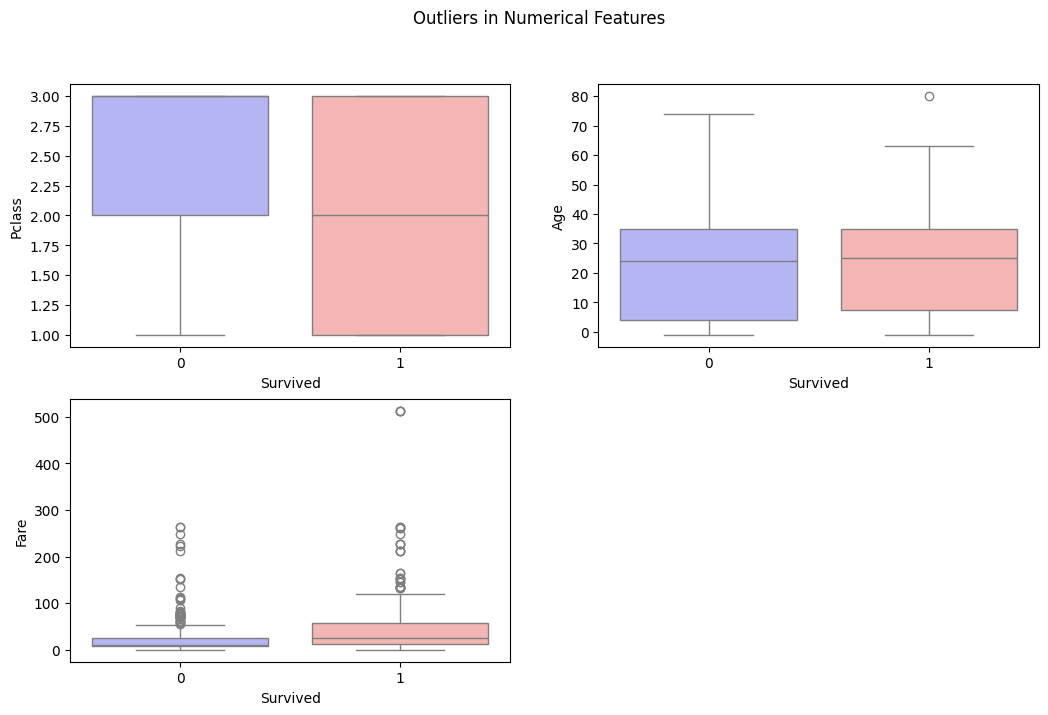

In [45]:
import seaborn as sns
figure, axes = plt.subplots(2, 2, figsize = (12.5, 7.5))
figure.suptitle("Outliers in Numerical Features")
figure.delaxes(axes[1][1])

sns.boxplot(ax = axes[0, 0], data = dataset, x = "Survived", y = "Pclass", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = dataset, x = "Survived", y = "Age", palette = "bwr")
sns.boxplot(ax = axes[1, 0], data = dataset, x = "Survived", y = "Fare", palette = "bwr")

<Axes: xlabel='Survived', ylabel='Embarked'>

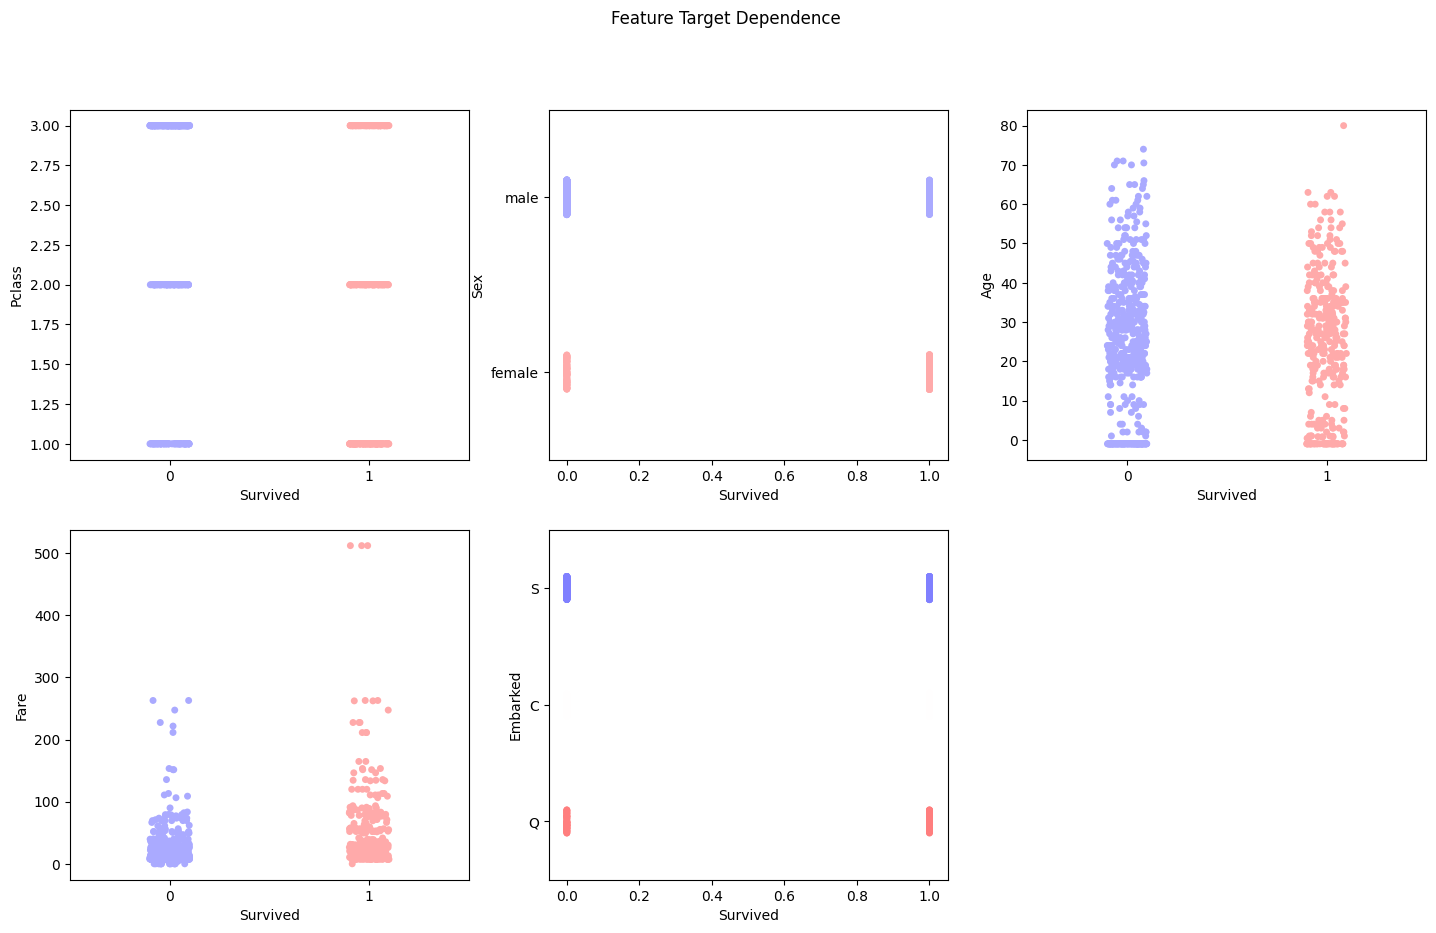

In [46]:
figure, axes = plt.subplots(2, 3, figsize = (17.5, 10))
figure.delaxes(axes[1][2])
figure.suptitle("Feature Target Dependence")

#island
sns.stripplot(ax = axes[0, 0], data = dataset, x = "Survived", y = "Pclass", palette = "bwr")
sns.stripplot(ax = axes[0, 1], data = dataset, x = "Survived", y = "Sex", palette = "bwr")
sns.stripplot(ax = axes[0, 2], data = dataset, x = "Survived", y = "Age", palette = "bwr")
sns.stripplot(ax = axes[1, 0], data = dataset, x = "Survived", y = "Fare", palette = "bwr")
sns.stripplot(ax = axes[1, 1], data = dataset, x = "Survived", y = "Embarked", palette = "bwr")

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    # Add the conTocat function
    def conTocat(self, X, y):
        best_thresholds = {}
        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            feature_values = X[:, feature_index]
            unique_values = np.unique(feature_values)
            best_gain = 0.0
            best_threshold = None

            for value in unique_values:
                left_indices = feature_values < value
                right_indices = ~left_indices

                left_y = y[left_indices]
                right_y = y[right_indices]

                if len(left_y) == 0 or len(right_y) == 0:
                    continue

                gain = self._information_gain(y, left_y, right_y)

                if gain > best_gain:
                    best_gain = gain
                    best_threshold = value

            best_thresholds[feature_index] = best_threshold

        return best_thresholds

    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1 or n_samples < 2:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        best_split = self._find_best_split(X, y)

        if best_split is None:
            return Node(value=self._most_common_label(y))

        feature_index, threshold = best_split
        left_indices = X[:, feature_index] < threshold
        right_indices = ~left_indices

        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature_index, threshold, left, right)

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        if n_samples <= 1:
            return None

        parent_entropy = self._entropy(y)

        best_gain = 0.0
        best_split = None

        for feature_index in range(n_features):
            threshold = self.thresholds_[feature_index]
            left_indices = X[:, feature_index] < threshold
            right_indices = ~left_indices

            if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                continue

            gain = self._information_gain(y, y[left_indices], y[right_indices])

            if gain > best_gain:
                best_gain = gain
                best_split = (feature_index, threshold)

        return best_split

    # Add the conTocat function
    # def _find_best_split(self, X, y):

    #     self.thresholds_ = self.conTocat(X, y)
    #     return self.thresholds_

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        if n_samples <= 1:
            return None

        parent_entropy = self._entropy(y)

        best_gain = 0.0
        best_split = None

        for feature_index in range(n_features):
            thresholds, unique_indices = np.unique(X[:, feature_index], return_index=True)
            for i in range(1, len(thresholds)):
                threshold = (thresholds[i - 1] + thresholds[i]) / 2
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                gain = self._information_gain(y, y[left_indices], y[right_indices])

                if gain > best_gain:
                    best_gain = gain
                    best_split = (feature_index, threshold)

        return best_split

    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities))

    def _information_gain(self, parent, left_child, right_child):
        p = len(left_child) / len(parent)
        return self._entropy(parent) - p * self._entropy(left_child) - (1 - p) * self._entropy(right_child)

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree_) for x in X])

    def _predict_sample(self, x, tree):
        if tree.value is not None:
            return tree.value

        feature_value = x[tree.feature_index]
        if feature_value < tree.threshold:
            return self._predict_sample(x, tree.left)
        else:
            return self._predict_sample(x, tree.right)


def Infer(sample):


    dt = DecisionTree(max_depth=3) # Adjusting max_depth
    dt.fit(X_train, y_train)

    # Make predictions
    prediction = dt.predict(np.array([sample]))[0]

    # Return the predicted label
    return prediction



# Train the decision tree model
dt = DecisionTree(max_depth=5) # Adjusting max_depth
dt.fit(X_train, y_train)
# print(y_pred)
# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

# Compute accuracy on training and test splits

# test_accuracy = accuracy_score(y_test, y_pred)

# #
# print("Test Accuracy:", test_accuracy)

# Compute confusion matrix on the test data
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, F1-score on the test split
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 80.95238095238095
Confusion Matrix:
[[8 1]
 [3 9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.90      0.75      0.82        12

    accuracy                           0.81        21
   macro avg       0.81      0.82      0.81        21
weighted avg       0.83      0.81      0.81        21



# Question -- **2** (Linear Regression-1)  (TV marketing)





In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv'
df = pd.read_csv(url)

df.head()

TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9

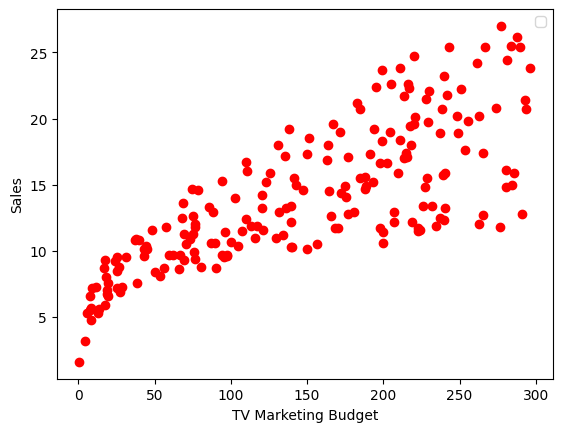

In [71]:
X=df["TV"].values.reshape(-1,1)
y=df["Sales"]

plt.scatter(X, y, color='red')



plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')

plt.legend()

plt.show()


The trend that we observe over here is that the scatter plot is very dense near origin where the budget is less. We can also observe that for same marketing budget(eg :300) , the difference in sales becomes quite evident as we go away from the origin (or when the budget becomes significantly high).

In [74]:
print(df.describe()) # shows mean max min of the dataset values

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


In [78]:
# Calculate the mean of each column
TV_mean_values = df["TV"].mean()

# Replace NaN values with the mean of each column
df["TV"].fillna(TV_mean_values, inplace=True)
Sales_mean_values = df["Sales"].mean()

# Replace NaN values with the mean of each column
df["Sales"].fillna(Sales_mean_values, inplace=True)

In [80]:
class LinearRegression:
    def __init__(self, learning_rate=1e-3, n_iters=1000):
        # init parameters
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _init_params(self):
        self.weights = np.zeros(self.n_features)
        self.bias = 0

    def _update_params(self, dw, db):
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def _get_prediction(self, X):
        return np.dot(X, self.weights) + self.bias

    def _get_gradients(self, X, y, y_pred):
        # get distance between y_pred and y_true
        error = y_pred - y
        # compute the gradients of weight & bias
        dw = (1 / self.n_samples) * np.dot(X.T, error)
        db = (1 / self.n_samples) * np.sum(error)
        return dw, db

    def fit(self, X, y):
        # get number of samples & features
        self.n_samples, self.n_features = X.shape
        # init weights & bias
        self._init_params()

        # perform gradient descent for n iterations
        for _ in range(self.n_iters):
            # get y_prediction
            y_pred = self._get_prediction(X)
            # compute gradients
            dw, db = self._get_gradients(X, y, y_pred)
            # update weights & bias with gradients
            self._update_params(dw, db)

    def predict(self, X):
        y_pred = self._get_prediction(X)
        return y_pred

RMSE error: 0.12650442774978574


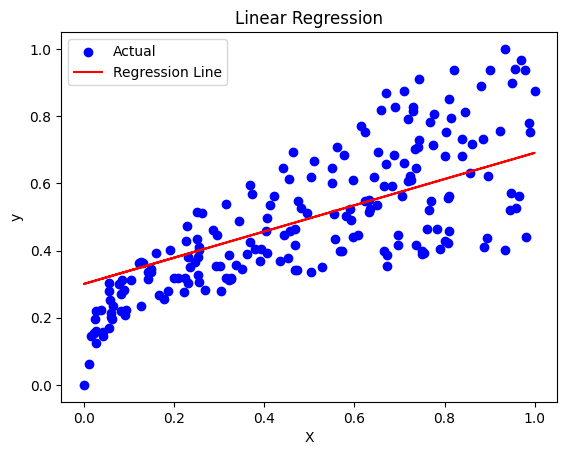

In [83]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# define helper function to evaluate
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_pred - y_true)**2))

# load dataset
# X, y = datasets.make_regression(
#     n_samples=1000, n_features=1, noise=20, random_state=1
# )

X=df["TV"]

#normalisation

X=((X-X.min())/(X.max()-X.min()))
X=X.values.reshape(-1,1)
y=df["Sales"]


y=y.values.reshape(-1)
y=((y-y.min())/(y.max()-y.min()))

# print(X)
# print(y)
# X=df["TV"]
# X=X.values.reshape(-1,1)
# y=df["Sales"]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# instantiate regressor and fit
linreg = LinearRegression(learning_rate=0.01, n_iters=1000)
linreg.fit(X_train, y_train)

# make prediction
predictions = linreg.predict(X_test)
y_pred = linreg.predict(X_train)

# Plot the data points
plt.scatter(X, y, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_train, y_pred, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
print(f"RMSE error: {rmse(y_test, predictions)}")

plt.show()


# Question -3

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Feature names for the Boston Housing dataset
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# data
# target
full_data = np.column_stack((data, target))

# Convert to DataFrame
df = pd.DataFrame(full_data, columns=feature_names + ['PRICE'])

# Check for missing values
missing_values = df.isna().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])
df.head()

Columns with missing values:
Series([], dtype: int64)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [56]:
class MultivariateLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            # Predictions
            y_predicted = np.dot(X, self.weights) + self.bias

            # Gradient calculation
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Mean Squared Error: 23.153074110019027


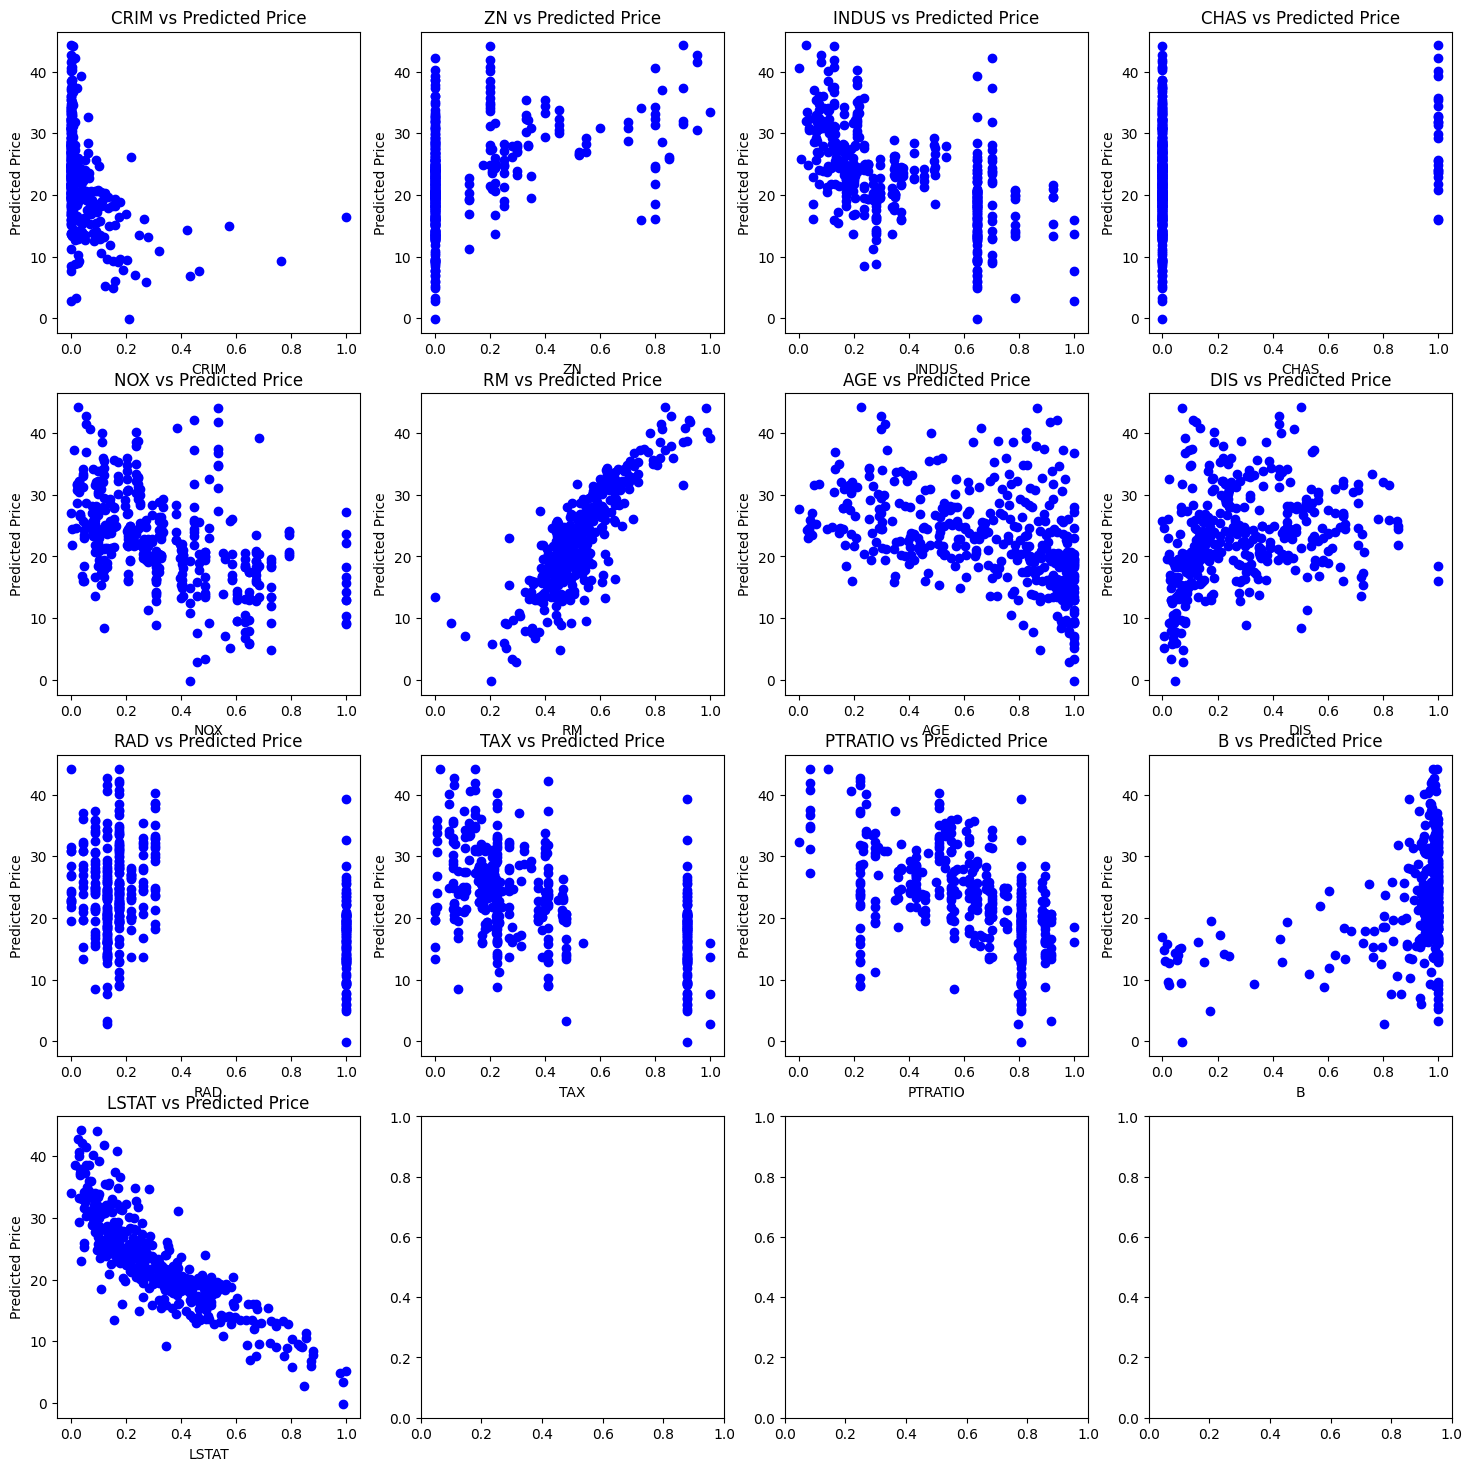

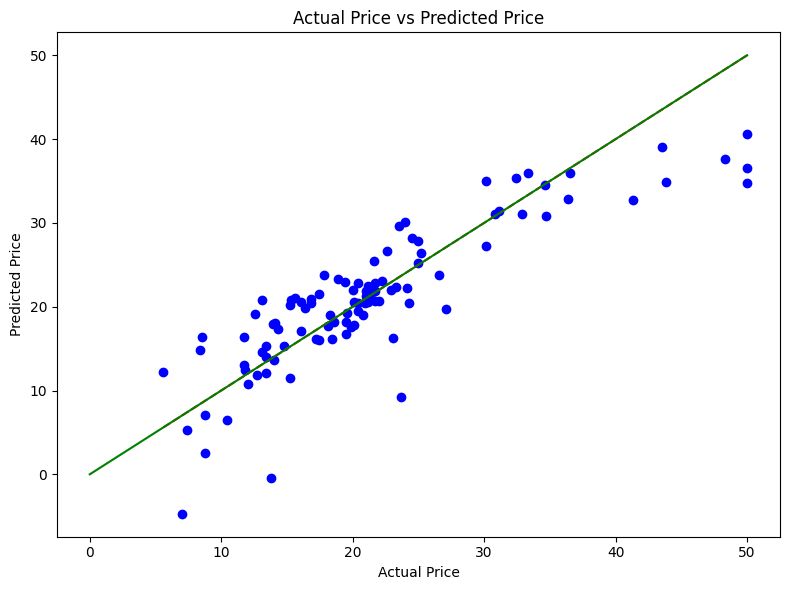

<Figure size 640x480 with 0 Axes>

In [91]:
X, y = data, target

    # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

    # Data normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

    # Model training
regression_model = MultivariateLinearRegression(learning_rate=0.1, n_iterations=2000)
regression_model.fit(X_train_scaled, y_train)

    # Model evaluation
y_pred = regression_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

    # Print coefficients
# print('Coefficients: ', regression_model.weights)

    # Plot the data points
fig, axes = plt.subplots(4, 4, figsize=(18, 18))


for i, ax in enumerate(axes.flatten()):
    if i < 13:
         ax.scatter(X_train_scaled[:, i], regression_model.predict(X_train_scaled), color='blue')
         ax.set_xlabel(feature_names[i])
         ax.set_ylabel("Predicted Price")
         ax.set_title(f"{feature_names[i]} vs Predicted Price")

# for i, ax in enumerate(axes.flatten()):
#     if i < 13:
#         ax.scatter(X_train_scaled[:, i], regression_model.predict(X_train_scaled), color='blue', label='Predicted Price')
#         ax.scatter(X_train_scaled[:, i], y_train, color='red', label='Actual Price')
#         ax.set_xlabel(feature_names[i])
#         ax.set_ylabel("Price")
#         ax.set_title(f"{feature_names[i]} vs Price")
#         ax.legend()
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')

plt.plot([0, y_test.max()], [0, y_test.max()], color='green', linestyle='-', label='Slope 45 Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')


plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
